
4. Use the attached classification dataset. 
Files in dataset:
cv-train.txt - Training instances + labels (200 rows x 58 cols)
cv-test.txt - Test instances + labels (50 rows x 58 cols)
Each line of these text files is a separate training example; the first 57 columns correspond to features, while the last column is the label (+1/ − 1).
	Train a SVM model to classify the features. Calculate the accuracy of the trained SVM model. 


In [421]:
import numpy as np
import pandas as pd
import cvxopt
import matplotlib.pyplot as plt

1. Train a SVM to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision boundary for each update.

In [422]:

def getalpha(x, y):
    
    m, n = x.shape

    # Reshape y to a column vector
    y = y.reshape(-1, 1)  
    
    # Compute H
    H = (y @ y.T) * (x @ x.T)  
    # Ensure H is double type
    H = np.array(H, dtype='double')  

    # Convert to cvxopt matrix
    P = cvxopt.matrix(H) 

    # Vector of -1's
    q = cvxopt.matrix(-np.ones((m, 1), dtype='double'))  

    # Inequality constraint Gx <= h ,G =  -I 
    G = cvxopt.matrix(-np.eye(m))  

    # Vector of zeros
    h = cvxopt.matrix(np.zeros((m, 1), dtype='double'))  

    # Equality constraint Ax = b
    A = cvxopt.matrix(y.T, (1, m), 'd')  
    b = cvxopt.matrix(0.0)

    # Solve the quadratic programming problem
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    # Extract alpha values
    alphas = np.array(solution['x']).flatten()  
    return alphas


In [423]:
def train_svm(data, labels):
   
    x = np.array(data)
    y = np.array(labels)

    # Compute alpha values
    alphas = getalpha(x, y)  

    # Identify support vectors
    support_indices = alphas > 1e-4  
    support_vectors = x[support_indices]
    support_labels = y[support_indices]
    support_alphas = alphas[support_indices]

    # Calculate weights
    w = (support_alphas * support_labels).reshape(-1, 1) * support_vectors
    w = w.sum(axis=0) 

    # Calculate bias
    b = support_labels - np.dot(support_vectors, w)
    b = b.mean()  # Average bias

    return w.flatten(), b, support_vectors, support_labels, support_alphas  # Flatten w for easier handling


In [424]:

def plot_svm(X, y, w, b, labels = ['Class 1', 'Class -1']):
    # Define x and y scale limits
    #print(X)
    x_min = min(X[:, 0]) - 1
    x_max = max(X[:, 0]) + 1
    y_min = min(X[:, 1]) - 1
    y_max = max(X[:, 1]) + 1

    # Generate line for decision boundary
    xx = np.linspace(x_min, x_max, 100)
    a = -w[0] / w[1]
    yy = a * xx - b / w[1]
    
    # Calculate margin
    margin = 1 / np.sqrt(np.sum(w**2))
    yy_neg = yy - np.sqrt(1 + a**2) * margin
    yy_pos = yy + np.sqrt(1 + a**2) * margin
    
    # Plot decision boundary and margins
    
    plt.plot(xx, yy, "b-", label="Decision Boundary")
    plt.plot(xx, yy_neg, "m--", label="Margin")
    plt.plot(xx, yy_pos, "m--")
    
    # Scatter plot of data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="cyan", edgecolors="black", label=labels[0])
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="yellow", edgecolors="black", label=labels[1])

    # Plot settings
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("SVM Decision Boundary and Margin")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)
    plt.grid(True)
    plt.show()



     pcost       dcost       gap    pres   dres
 0: -1.7500e+00 -4.2500e+00  8e+00  2e+00  2e+00
 1: -3.6653e+00 -4.3941e+00  1e+00  3e-01  3e-01
 2: -3.9945e+00 -4.0256e+00  3e-02  9e-16  5e-16
 3: -3.9999e+00 -4.0003e+00  3e-04  1e-15  3e-16
 4: -4.0000e+00 -4.0000e+00  3e-06  9e-16  8e-16
Optimal solution found.


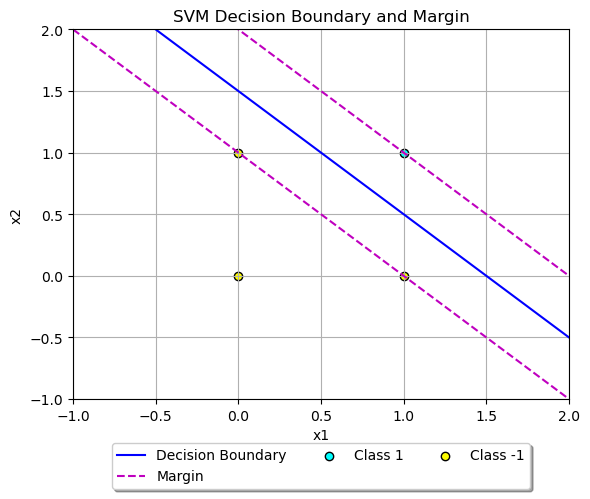

In [425]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])

# Train SVM
w, b, support_vectors, support_labels, support_alphas = train_svm(x, y)

# Plot final decision boundary
plot_svm(x, y, w, b)

2.  Train a single perceptron to learn the two classes in the following table.

x1 x2 ω
2, 2, 1

-1, -3, 0

-1, 2, 1

0, -1, 0

1, 3, 1

-1, -2, 0

1, -2, 0

-1, -1,  1

where x1 and x2 are the inputs and ω is the target class. Assume that all the weights are initialized as 0 with learning rates 0.001, 0.01, 0.5 separately. Plot the samples and decision boundary. Also, tabulate the number of iterations required to converge the algorithm with these learning rates. 

In [426]:
def perceptron(a, data, learning_rate):
    # Transform data within the function
    trans_data = []
    for d in data:
        if d[2] == 2 or d[2] == 0:
            # For class 2, negate the features and assign a -1 bias
            trans_data.append([-d[0], -d[1], -1])
        else:
            # For class 1, retain positive features and assign a +1 bias
            trans_data.append([d[0], d[1], 1])
    
    trans_data = np.array(trans_data)
    i = 0
    count = 0
    iters = 1
    max_iters = 1000

    while True:
        transa = np.transpose(a)
        #Calculate the dot product
        err = transa @ trans_data[i]

        #Print computation details
        print(f"Iteration:{iters}")
        print(f"Feature vector:{trans_data[i][:2]}")
        print(f"Current weights:{a[:2]}")
        print(f"Bias:{a[2]}")
        print(f"Weighted sum:{err}")

        if err > 0:
            #If positive no need to update weights
            count += 1
            i = (i + 1) % len(trans_data)
        else:
            #If negative update the weights
            count = 0
            a = a + learning_rate * trans_data[i]

        #If everything is classified correctly or the maximum number of iterations is reached, break
        if count == len(trans_data) or iters > max_iters:
            break

        
        iters += 1

    #array for final weights
    weight = np.array([a[0], a[1]])
    print("Final weights obtained:", weight)
    bias = a[2]
    print("Bias: ", bias)
    return weight, bias, iters


In [427]:
# Function to plot data points and decision boundary
def plot_perceptron_result(data, weights, bias, l1, l2):
    
    class1 = data[data[:, 2] == l1] 
    class2 = data[data[:, 2] == l2]

    # Ploting data points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')

    # Generating decision boundary x-values
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]) + 1, 100)
    
    # Calculate the corresponding y-values for the decision boundary
    y_values = -(weights[0] * x_values + bias) / weights[1]

    # Plotting the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    # Setting labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)    
    plt.title('Perceptron Classification')
    plt.show()



In [428]:
#Writing given data
dataq2 = [[2, 2, 1], [-1, -3, 0], [-1, 2, 1], [0, -1, 0], [1, 3, 1], [1, -2, 0], [-1, -1, 1]]
l1 = 0.001
l2 = 0.01
l3 = 0.5

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:3
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.007
Iteration:4
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.003
Iteration:5
Feature vector:[0 1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:6
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:7
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:-0.003
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.001 0.001]
Bias:0.002
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.003
Weighted sum:0.003
Iteration:11
Feature vector:[2 2]
Current weights:[0

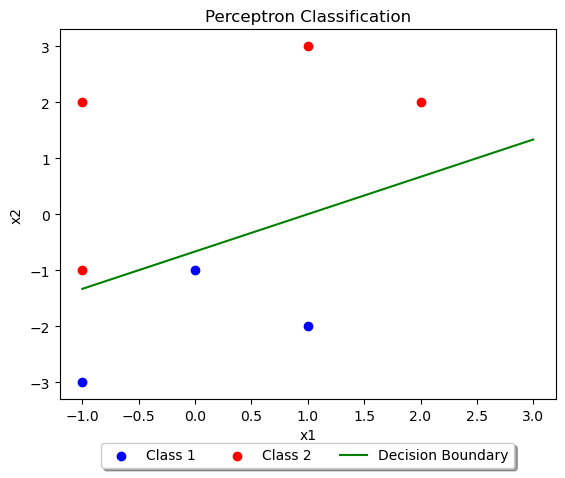

No of iterations for learning rate 0.001 is 48


In [429]:
#Learning rate 0.001
#Initialize weights
w3 = np.array([0, 0, 0])
b = 0
weightsq2, biasq2, itersq2 = perceptron(w3, dataq2, l1)
plot_perceptron_result(np.array(dataq2), weightsq2, biasq2, 0, 1)
print(f"No of iterations for learning rate {l1} is {itersq2}")

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:3
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.07
Iteration:4
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.03
Iteration:5
Feature vector:[0 1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:6
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:7
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:-0.03
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.01 0.01]
Bias:0.02
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.03
Weighted sum:0.03
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:0.03
Weighted sum:0.03
Iteration:12
Feature vector:[

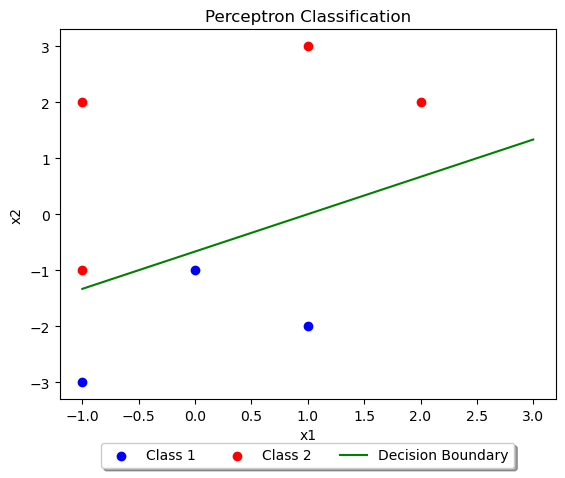

No of iterations for learning rate 0.01 is 48


In [430]:
#Learning rate 0.001
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weights, bias, iters2 = perceptron(w, dataq2, l2)
plot_perceptron_result(np.array(dataq2), weights, bias, 0, 1)
print(f"No of iterations for learning rate {l2} is {iters2}")

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:3
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:3.5
Iteration:4
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:1.5
Iteration:5
Feature vector:[0 1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:6
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:7
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:8
Feature vector:[-1 -1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:-1.5
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.5 0.5]
Bias:1.0
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:12
Feature vector:[1 3]
Current weights:[0. 0.]
Bias:1.5
Weighted su

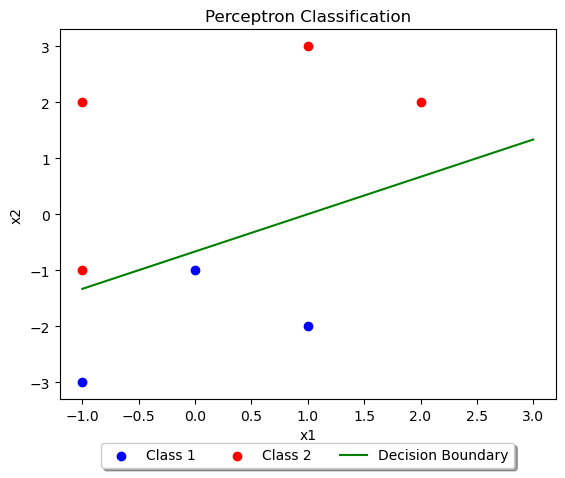

No of iterations for learning rate 0.5 is 48


In [431]:
#Learning rate 0.5
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weightsq2, biasq2, iters3 = perceptron(w, dataq2, l3)
plot_perceptron_result(np.array(dataq2), weightsq2, biasq2, 0, 1)
print(f"No of iterations for learning rate {l3} is {iters3}")

3. From the iris dataset, choose the ’petal length’, ’sepal width’ for setosa, versicolor and virginica flowers. Learn a decision boundary for the two features using a SVM. Assume that all the weights are initialized as 0 and learning rate as 0.01. Plot the samples and draw the decision boundary.
[Note: => Use iris.csv file in the attachments.
 =>  3 class classification problem.]

In [432]:
iris_df = pd.read_csv('iris.csv')
df = iris_df[['PetalLengthCm', 'SepalWidthCm', 'Species']]


In [433]:
# divide the datset based on species and drop species
df_setosa = df[df['Species'] == 'Iris-setosa'].drop(['Species'], axis=1)

df_versicolor = df[df['Species'] == 'Iris-versicolor'].drop(['Species'], axis=1)

df_virginica = df[df['Species'] == 'Iris-virginica'].drop(['Species'], axis=1)


In [434]:
# take only features from setosa and versicolor
x12 = pd.concat([df_setosa, df_versicolor]).values
x12 = np.array(x12)

y12 = np.array([1] * 50 + [-1] * 50)

# take only features from versicolor and virginica
x23 = pd.concat([df_versicolor, df_virginica]).values
x23 = np.array(x23)

y23 = np.array([1] * 50 + [-1] * 50)

# take only features from virginica and setosa
x31 = pd.concat([df_virginica, df_setosa]).values
x31 = np.array(x31)

y31 = np.array([1] * 50 + [-1] * 50)

In [435]:

learning_rate = 0.01

# Negate the features of the points with label -1
x12[y12 == -1] = -x12[y12 == -1]

x23[y23 == -1] = -x23[y23 == -1]

x31[y31 == -1] = -x31[y31 == -1]

     pcost       dcost       gap    pres   dres
 0: -9.5764e-01 -1.2726e+00  1e+02  1e+01  1e+00
 1: -1.1282e-01 -1.5059e-01  4e+00  3e-01  3e-02
 2:  2.7097e-03 -1.3303e-01  1e-01  5e-17  8e-16
 3: -3.1976e-02 -5.1398e-02  2e-02  2e-17  4e-16
 4: -4.0490e-02 -5.3904e-02  1e-02  3e-17  3e-16
 5: -4.7136e-02 -4.8460e-02  1e-03  1e-17  3e-16
 6: -4.8272e-02 -4.8307e-02  4e-05  2e-17  3e-16
 7: -4.8303e-02 -4.8303e-02  4e-07  2e-17  3e-16
 8: -4.8303e-02 -4.8303e-02  4e-09  8e-18  3e-16
Optimal solution found.
Decision boundary for Iris-setosa and Iris-versicolor


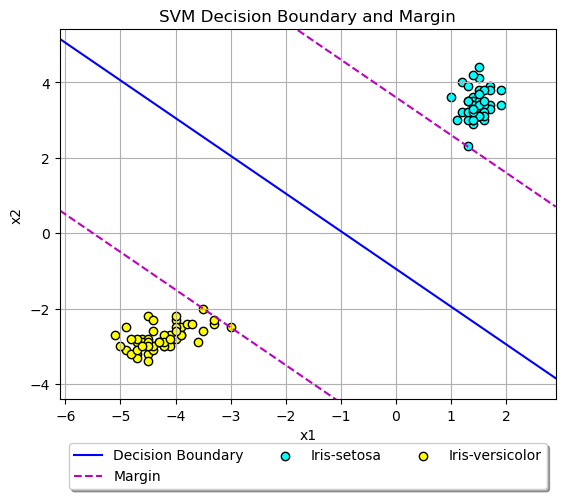

In [436]:
#Train SVM for Iris-setosa and Iris-versicolor
w12, b12, sv12, slabels12, salphas12 = train_svm(x12, y12)

#Plot the decision boundary
print("Decision boundary for Iris-setosa and Iris-versicolor")
plot_svm(x12, y12, w12, b12, ["Iris-setosa", "Iris-versicolor"])

     pcost       dcost       gap    pres   dres
 0: -8.4343e-01 -1.0587e+00  1e+02  1e+01  1e+00
 1: -6.8826e-02 -8.6722e-02  4e+00  3e-01  3e-02
 2:  3.0491e-03 -7.3332e-02  8e-02  6e-17  9e-16
 3: -1.6886e-02 -2.5494e-02  9e-03  1e-17  5e-16
 4: -2.0687e-02 -2.7464e-02  7e-03  1e-17  3e-16
 5: -2.4062e-02 -2.4667e-02  6e-04  5e-18  3e-16
 6: -2.4609e-02 -2.4616e-02  8e-06  3e-18  3e-16
 7: -2.4615e-02 -2.4615e-02  8e-08  7e-18  4e-16
Optimal solution found.
Decision boundary for Iris-versicolor and Iris-virginica


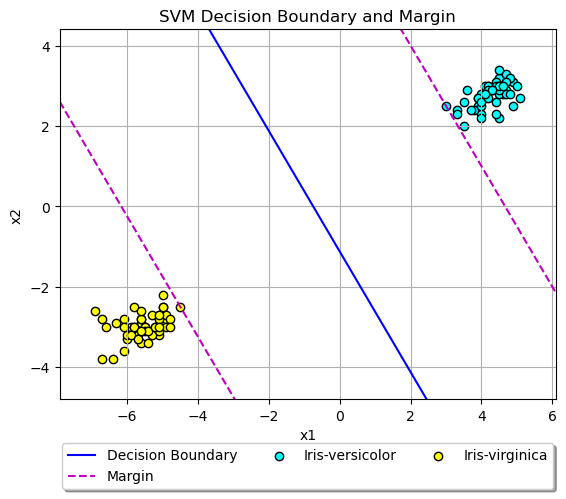

In [437]:
#Train SVM for Iris-setosa and Iris-versicolor
w23, b23, sv23, slabels23, salphas23 = train_svm(x23, y23)


#Plot the decision boundary
print("Decision boundary for Iris-versicolor and Iris-virginica")
plot_svm(x23, y23, w23, b23, ["Iris-versicolor", "Iris-virginica"])

     pcost       dcost       gap    pres   dres
 0: -8.2685e-01 -1.0636e+00  2e+02  1e+01  1e+00
 1: -3.8237e-02 -1.1427e-01  4e+00  3e-01  3e-02
 2:  5.4402e-03 -1.0442e-01  1e-01  9e-17  9e-16
 3: -2.3326e-02 -3.6007e-02  1e-02  2e-17  5e-16
 4: -2.8533e-02 -4.0108e-02  1e-02  2e-17  4e-16
 5: -3.4085e-02 -3.5445e-02  1e-03  4e-17  3e-16
 6: -3.5272e-02 -3.5289e-02  2e-05  1e-17  3e-16
 7: -3.5286e-02 -3.5286e-02  2e-07  7e-18  2e-16
 8: -3.5286e-02 -3.5286e-02  2e-09  2e-17  2e-16
Optimal solution found.
Decision boundary for Iris-virginica and Iris-setosa


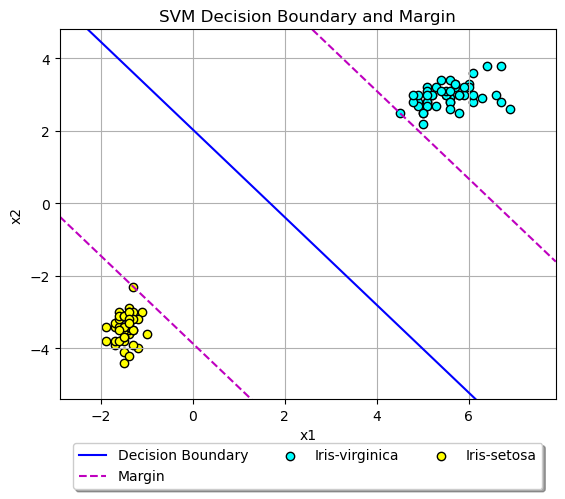

In [438]:
#Train SVM for Iris-setosa and Iris-versicolor
w31, b31, sv31, slabels31, salphas31 = train_svm(x31, y31)

#Plot the decision boundary
print("Decision boundary for Iris-virginica and Iris-setosa")
plot_svm(x31, y31, w31, b31, ["Iris-virginica", "Iris-setosa"])

In [ ]:
train_data = pd.read_csv("cv-train.txt", delim_whitespace=True, header=None)
train_data.to_csv("cv-train.csv", index=False)

test_data = pd.read_csv("cv-test.txt", delim_whitespace=True, header=None)
test_data.to_csv("cv-test.csv", index=False)



/tmp/ipykernel_122874/3058978385.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv("cv-train.txt", delim_whitespace=True, header=None)
/tmp/ipykernel_122874/3058978385.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv("cv-test.txt", delim_whitespace=True, header=None)


In [ ]:
train_df = pd.read_csv("cv-train.csv")
test_df = pd.read_csv("cv-test.csv")

In [ ]:
test_df.columns = [f"F{i}" for i in range(1, 59)]
test_df['Class'] = test_df['F58']
test_df.drop(columns=['F58'], inplace=True)
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F49,F50,F51,F52,F53,F54,F55,F56,F57,Class
0,0.000000,0.000000,0.000000,0.0,0.090,0.000000,0.123796,0.000000,0.000000,0.049505,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000983,0.000601,0.001515,1.0
1,0.160793,0.025210,0.143137,0.0,0.000,0.124150,0.100413,0.099010,0.068441,0.019802,...,0.000000,0.011382,0.000000,0.015395,0.055472,0.000000,0.002051,0.002903,0.011048,1.0
2,0.000000,0.000000,0.090196,0.0,0.139,0.000000,0.127923,0.083708,0.000000,0.000000,...,0.015735,0.000000,0.000000,0.000000,0.000000,0.003480,0.000401,0.000701,0.004672,1.0
3,0.000000,0.055322,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027789,0.000000,0.008344,0.022489,0.000000,0.002049,0.002503,0.007134,1.0
4,0.000000,0.000000,0.062745,0.0,0.065,0.110544,0.044017,0.028803,0.000000,0.000000,...,0.000000,0.010870,0.000000,0.000000,0.026487,0.000000,0.000448,0.000901,0.008712,1.0
5,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.171939,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001136,1.0
6,0.000000,0.000000,0.096078,0.0,0.148,0.000000,0.067400,0.000000,0.000000,0.000000,...,0.000000,0.008409,0.000000,0.015303,0.027486,0.000000,0.003734,0.007709,0.014141,1.0
7,0.129956,0.000000,0.115686,0.0,0.000,0.000000,0.000000,0.053105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003356,0.127103,0.000000,0.001816,0.003104,0.007134,1.0
8,0.000000,0.000000,0.103922,0.0,0.021,0.017007,0.013755,0.047705,0.019011,0.011551,...,0.000000,0.009947,0.000000,0.000493,0.010828,0.000000,0.001002,0.002803,0.023990,1.0
9,0.000000,0.000000,0.062745,0.0,0.064,0.108844,0.088033,0.028803,0.060837,0.000000,...,0.000000,0.015997,0.000000,0.000000,0.025987,0.000000,0.000683,0.001802,0.009343,1.0


In [ ]:
train_df.columns = [f"F{i}" for i in range(1, 59)]
train_df['Class'] = train_df['F58']
train_df.drop(columns=['F58'], inplace=True)
train_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F49,F50,F51,F52,F53,F54,F55,F56,F57,Class
0,0.000000,0.000000,0.000000,0.0,0.094,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.013178,0.000000,0.000000,0.003315,0.003004,0.006692,1.0
1,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.074754,0.0,0.022446,0.000000,0.000000,0.002572,0.000801,0.001389,1.0
2,0.101322,0.032213,0.050980,0.0,0.000,0.056122,0.008253,0.029703,0.0,0.061606,...,0.008210,0.008614,0.0,0.008560,0.038314,0.004236,0.002621,0.003905,0.056629,1.0
3,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.143054,0.000000,0.0,0.000000,...,0.013911,0.025226,0.0,0.018936,0.010162,0.003076,0.002104,0.005807,0.009154,1.0
4,0.000000,0.041317,0.000000,0.0,0.000,0.000000,0.081155,0.000000,0.0,0.032453,...,0.000000,0.026354,0.0,0.000000,0.000000,0.000000,0.006887,0.006508,0.015657,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.125490,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.035685,0.0,0.035716,0.000000,0.000000,0.001926,0.001402,0.006439,-1.0
196,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.005947,0.0,0.000000,0.000000,0.000000,0.000139,0.000200,0.000884,-1.0
197,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.034249,0.0,0.000000,0.000000,0.000000,0.002118,0.001702,0.003725,-1.0
198,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000241,0.000200,0.001136,-1.0
